# What is Survival Analysis?

[Survival analysis](https://en.wikipedia.org/wiki/Survival_analysis) is used to study the **time** until some **event** of interest (often reffered to as *death*) occurs.  **Time** could be measured in years, months, weeks, days, etc.  The **event** could be anything of interest.  It could be an actual death, a birth, a Pokemon Go server crash, etc. In this post we are interested in how long drafted NFL players are in the league, so the **event** of interest will be the retirement of drafted NFL players. The duration of time leading up to the event of interest can be called the **survival time**. In our case, the survival time the number of years that a player was active in the league (according to [Pro Football Reference](http://www.pro-football-reference.com/)).  

Some of the players in this analysis are still active players (e.g. Aaron Rodgers, Eli Manning, etc.), so we have yet to observe their retirement (the event of interest).  Those players are considered **censored**. While we have some information about their career length (or survival time), we don't know the full length of their career.  This specific type of censorship, one in which we do not observe end of the survival time, is called **right-censorship**.  

The methods developed in the field of survival analysis were created in order to deal with the issue of censored data.  The methodology used in this post to estimate the **survival function** of NFL players is a [non-parametric](https://en.wikipedia.org/wiki/Nonparametric_statistics) estimator called the [Kaplan-Meier estimator](https://en.wikipedia.org/wiki/Kaplan%E2%80%93Meier_estimator) was developed to handle incomplete or censored data.


## A brief comment on the data used.

I used the draft data scraped from my [previous post](http://savvastjortjoglou.com/nfl-draft.html). The duration of a player's career is just the difference between "To" value from the [PFR draft table](http://www.pro-football-reference.com/years/2015/draft.htm) and the year the player was drafted.  I also was able to find which players were still considered active by just seeing who's name was in bold.  However there are may be some players who are retired that PFR still considers active. You can check out how prepped the data in [this Jupyter notebook](https://github.com/savvastj/nfl_survival_analysis/blob/master/Data_Prep.ipynb). Let me know if you see any issues/mistakes I've made.

# What is a Survival Function?

# Using the Kaplan-Meier Estimator to Estimate the Survival Function of NFL Players

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
draft_df = pd.read_csv("data/nfl_survival_analysis_data.csv")

In [3]:
# set some plotting aesthetics
sns.set(palette = "colorblind", font_scale = 1.35, 
        rc = {"figure.figsize": (12,9), "axes.facecolor": ".92"})

# Fit Kaplan Meier Estimator to estimate the Survival Function.

In [4]:
# T tends to represent the survival (Duration) T time range
T = draft_df.Duration
# C tends to represent whether the event of interest (end of career) is observed
C = draft_df.Retired

In [5]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()

In [6]:
kmf.fit(T, event_observed = C)

<lifelines.KaplanMeierFitter: fitted with 15592 observations, 1629 censored>

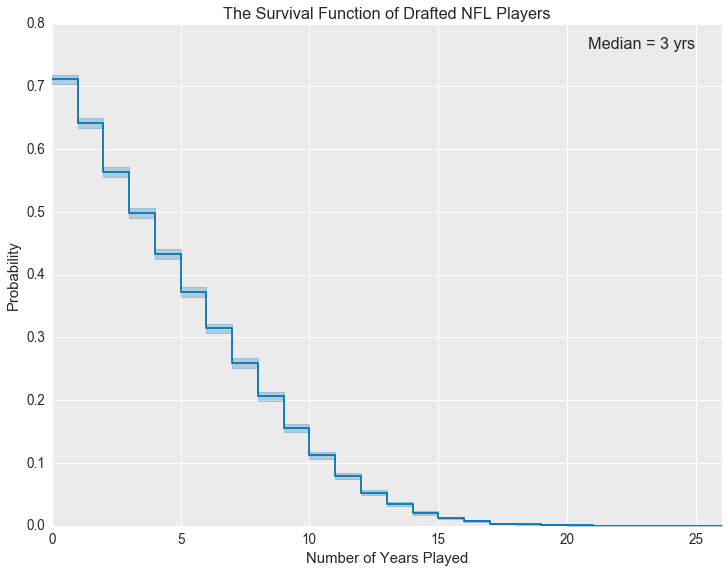

In [7]:
ax = kmf.plot(legend=False)

ax.annotate("Median = {:.0f} yrs".format(kmf.median_), xy = (.8, .95), 
            xycoords = "axes fraction")
plt.title("The Survival Function of Drafted NFL Players")
plt.ylabel("Probability")
plt.xlabel("Number of Years Played")

plt.show()

In [8]:
kmf.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0,4597.0,4504.0,93.0,15592.0,15592.0
1,1310.0,1076.0,234.0,0.0,10995.0
2,1415.0,1176.0,239.0,0.0,9685.0
3,1183.0,952.0,231.0,0.0,8270.0
4,1126.0,942.0,184.0,0.0,7087.0
5,967.0,822.0,145.0,0.0,5961.0
6,915.0,782.0,133.0,0.0,4994.0
7,823.0,715.0,108.0,0.0,4079.0
8,743.0,667.0,76.0,0.0,3256.0


## Plot KM estimate by position.

### Merge or drop some player positions

In [9]:
draft_df.Pos.unique()

array(['DE', 'RB', 'QB', 'LB', 'WR', 'C', 'T', 'DT', 'G', 'HB', 'DB', 'TE',
       'K', 'FL', 'E', 'P', 'FB', 'WB', 'NT', 'KR', 'OL', 'DL', 'OLB',
       'CB', 'FS', 'ILB', 'SS', 'S', 'LS'], dtype=object)

In [10]:
draft_df.Pos.value_counts()

DB     2668
LB     2039
RB     1798
WR     1793
DE     1242
T      1174
G      1028
DT      987
TE      873
QB      722
C       450
K       197
P       156
NT      134
FB       91
FL       63
OL       39
CB       29
E        29
HB       23
OLB      23
ILB      11
SS        7
FS        5
DL        4
KR        3
WB        2
LS        1
S         1
Name: Pos, dtype: int64

In [11]:
# Relabel some of the positions
draft_df.loc[draft_df.Pos == "HB", "Pos"] = "RB"

draft_df.loc[draft_df.Pos.isin(["SS", "FS", "S", "CB"]), "Pos"] = "DB"

draft_df.loc[draft_df.Pos.isin(["OLB", "ILB"]), "Pos"] = "LB"

In [12]:
# drop players from the following positions [FL, E, WB, KR, LS]
drop_idx = ~ draft_df.Pos.isin(["FL", "E", "WB", "KR", "LS", "DL", "OL"])

draft_df_2 = draft_df.loc[drop_idx, :]

In [13]:
len(draft_df_2.Pos.unique())

15

In [14]:
# T tends to represent the survival (Duration) T time range
T_2 = draft_df_2.Duration
# C tends to represent whether the event of interest (end of career) is observed
C_2 = draft_df_2.Retired

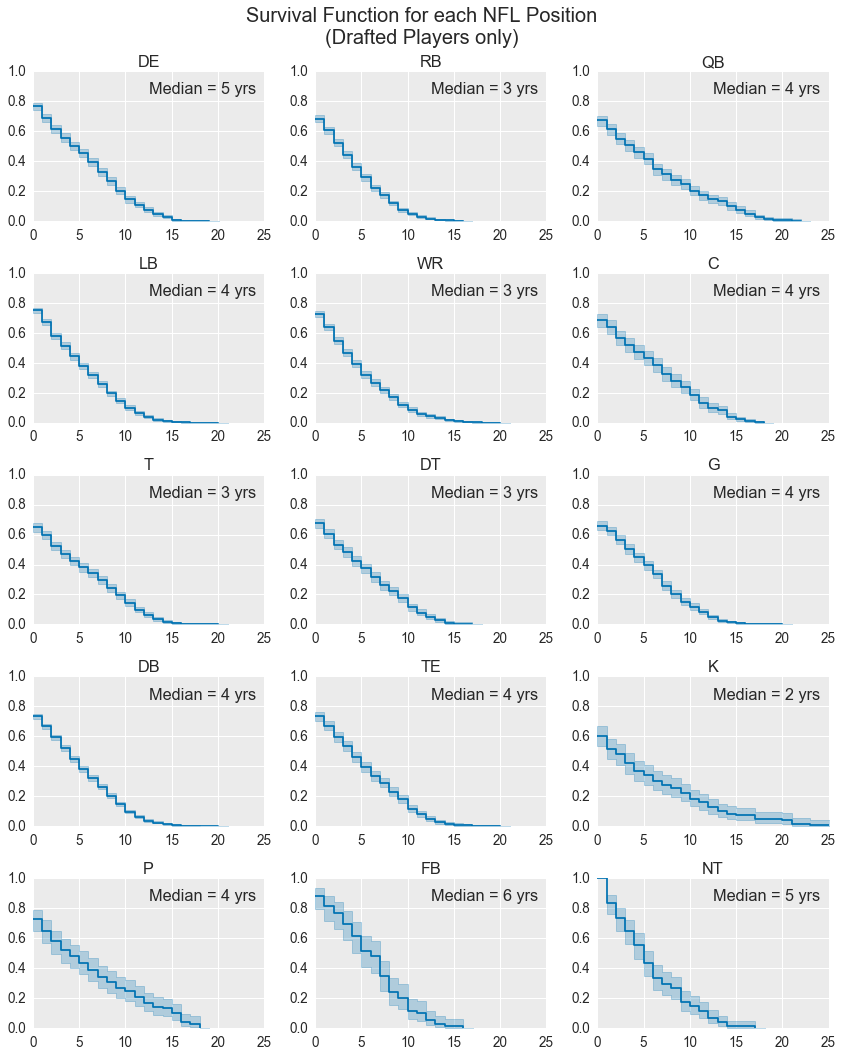

In [15]:
positions = draft_df_2.Pos.unique()

fig = plt.figure(figsize=(12,15))

for i, position in enumerate(positions):
    ax = plt.subplot(5,3,i+1)
    ix = draft_df_2.Pos == position
    kmf.fit( T_2[ix], C_2[ix], label=position )
    kmf.plot(ax=ax, legend=False)
    ax.annotate("Median = {:.0f} yrs".format(kmf.median_), xy = (.5, .85), 
            xycoords = "axes fraction")
    plt.title(position)
    plt.xlabel("")
    plt.xlim(0,25)
    plt.ylim(0,1)
#     if i==0:
#         plt.ylabel('Frac. in power after $n$ years')
plt.tight_layout()

fig.suptitle("Survival Function for each NFL Position\n(Drafted Players only)",
             fontsize=20)
plt.subplots_adjust(top=0.92)

# TODO
- Try by games played
- Try RBs by carries
- Then delve into explanations
- Leave Hazard function for another post?

# Sources

http://www.csee.wvu.edu/~xinl/library/papers/math/statistics/kaplan.pdf
https://lifelines.readthedocs.io/en/latest/Intro%20to%20lifelines.html
https://www.amazon.com/Survival-Analysis-Self-Learning-Statistics-Biology/dp/1441966455/ref=sr_1_1?ie=UTF8&qid=1469425536&sr=8-1&keywords=survival+analysis
https://www.cscu.cornell.edu/news/statnews/stnews78.pdf
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3932959/
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3059453/
http://www.garfield.library.upenn.edu/classics1983/A1983QS51100001.pdf